In [1]:
#Importing Libraries
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import Model, Sequential
from tensorflow.keras import Input  
import matplotlib.pyplot as plt
import numpy as np

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# Load the CIFAR-10 dataset
num_classes = 10
EPOCHS = 3

cifar10 = tf.keras.datasets.cifar10

# load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Onehot encode labels
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test  = tf.keras.utils.to_categorical(Y_test, num_classes)

In [3]:
train_size = 250
test_size  = 500
STEPS = int(len(X_train)/train_size)
VAL_STEPS = int(len(X_test)/test_size)

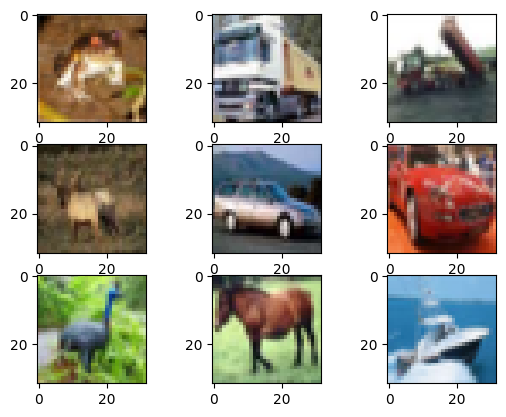

In [4]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # if you want to invert color, you can use 'gray_r'. this can be used only for MNIST, Fashion MNIST not cifar10
    # pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray_r'))
    
# show the figure
plt.show()

In [5]:

IMG_SIZE = 224                      # VGG19
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
num_classes = 10                    # cifar10

# 3-Layers Convolution neural network with one hidden layer
class CNN_Model(Model):
    def __init__(self):
        super(CNN_Model, self).__init__()
        
        # Convolution 1
        self.conv1 = Conv2D(64, 3, activation='relu', padding='SAME')
        
        # Max pool 1
        self.maxpool2d1 = MaxPool2D(padding='SAME')
     
        # Convolution 2
        self.conv2 = Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME')
        
        # Max pool 2
        self.maxpool2d2 = MaxPool2D(padding='SAME')
        
        # Convolution 3
        self.conv3 = Conv2D(filters=256, kernel_size=3, activation=tf.nn.relu, padding='SAME')
        
        # Max pool 3
        self.maxpool2d3 = MaxPool2D(padding='SAME')
        self.flatten = Flatten()
        self.d1 = Dense(256, activation='relu')
        self.d2 = Dropout(0.2)
        self.d3 = Dense(10, activation='softmax')

    def call(self, x):
        # Convolution 1
        x = self.conv1(x)
        
        # Max pool 1
        x = self.maxpool2d1(x)
        
        # Convolution 2 
        x = self.conv2(x)
        
        # Max pool 2 
        x = self.maxpool2d2(x)
        
        # Convolution 3
        x = self.conv3(x)
        # Max pool 3
        x = self.maxpool2d3(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        out = self.d3(x)
        return out



In [6]:
model = CNN_Model()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-29 00:59:23.235497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-29 00:59:23.235752: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_43867/3502799416.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm_notebook(total=STEPS, desc=f"Train Epoch {epoch+1}") as pbar:


Train Epoch 1:   0%|          | 0/200 [00:00<?, ?it/s]

2022-12-29 00:59:42.564692: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-29 00:59:42.566272: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-29 00:59:42.566378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_43867/3502799416.py:51: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm_notebook(total=VAL_STEPS, desc=f"Test_ Epoch {epoch+1}") as pbar:


Test_ Epoch 1:   0%|          | 0/20 [00:00<?, ?it/s]

2022-12-29 01:09:21.364477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 129ms/step - loss: 1.3056 - categorical_accuracy: 0.5260


Train Epoch 2:   0%|          | 0/200 [00:00<?, ?it/s]

Test_ Epoch 2:   0%|          | 0/20 [00:00<?, ?it/s]

16/16 [==============================] - 2s 128ms/step - loss: 1.1204 - categorical_accuracy: 0.5940


Train Epoch 3:   0%|          | 0/200 [00:00<?, ?it/s]

Test_ Epoch 3:   0%|          | 0/20 [00:00<?, ?it/s]

16/16 [==============================] - 2s 128ms/step - loss: 0.9868 - categorical_accuracy: 0.6380


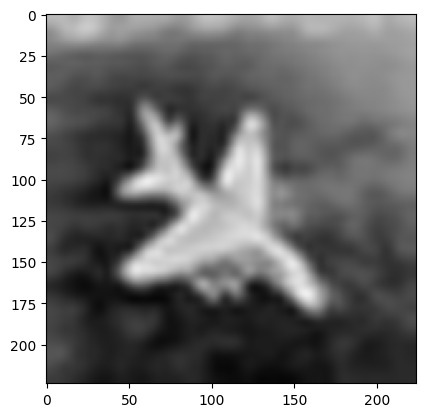

2022-12-29 01:31:28.261785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred: truck
acct: airplane


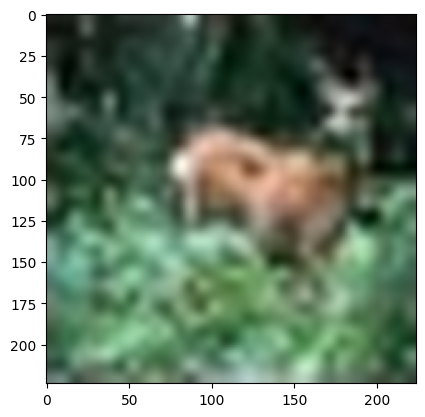

pred: deer
acct: deer


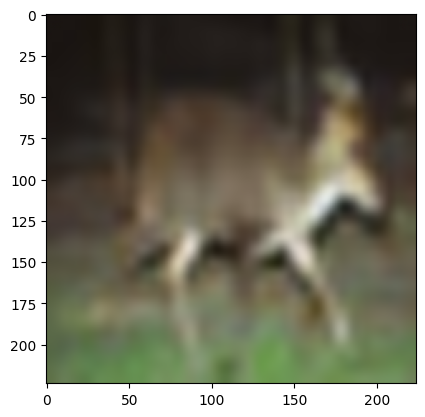

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred: deer
acct: deer


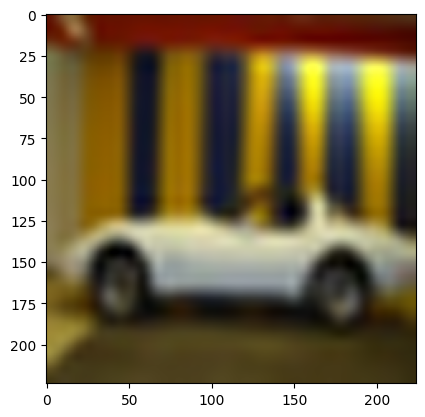

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred: automobile
acct: automobile


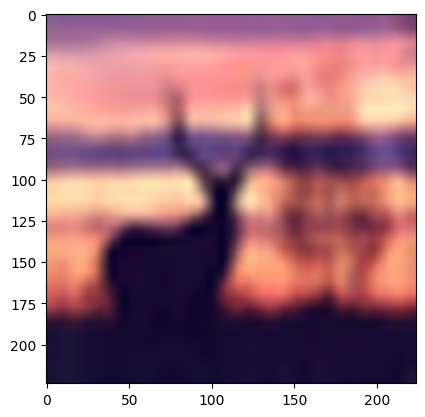

pred: airplane
acct: deer


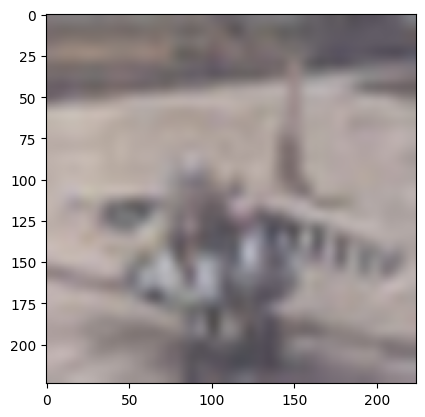

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred: bird
acct: airplane


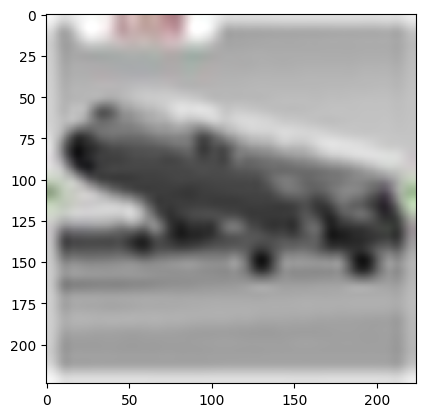

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred: airplane
acct: airplane


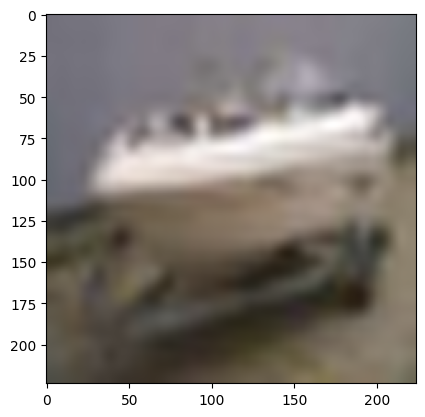

pred: ship
acct: ship


In [8]:


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model_name = 'cifar10_CNN'

import os.path
if os.path.isfile(model_name+'.h5'):
    model.load_weights(model_name+'.h5')

def getBatch(batch_size, train_or_val='train'):
    x_batch = []
    y_batch = []
    if train_or_val == 'train':
        idx = np.random.randint(0, len(X_train), (batch_size))

        for i in idx:
            img = cv2.resize(X_train[i], (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
            x_batch.append(img)
            y_batch.append(Y_train[i])
    elif train_or_val == 'val':
        idx = np.random.randint(0, len(X_test), (batch_size))

        for i in idx:
            img = cv2.resize(X_test[i], (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
            x_batch.append(img)
            y_batch.append(Y_test[i]) 
    else:
        print("error, please specify train or val")

    x_batch = np.array(x_batch)
    y_batch = np.array(y_batch)
    return x_batch, y_batch

from tqdm import tqdm, tqdm_notebook, trange

for epoch in range(EPOCHS):

    with tqdm_notebook(total=STEPS, desc=f"Train Epoch {epoch+1}") as pbar:    
        train_losses = []
        train_accuracies = []
        for s in range(STEPS):
            x_batch, y_batch = getBatch(train_size, "train")
            out= model.train_on_batch(x_batch, y_batch)
            loss_val = out[0]*100
            acc      = out[1]*100

            train_losses.append(loss_val)
            train_accuracies.append(acc)
            
            pbar.update(1)
            pbar.set_postfix_str(f"Loss: {loss_val:.4f} ({np.mean(train_losses):.4f}) Acc: {acc:.3f} ({np.mean(train_accuracies):.3f})")
            
    with tqdm_notebook(total=VAL_STEPS, desc=f"Test_ Epoch {epoch+1}") as pbar:    
        test_losses = []
        test_accuracies = []
        for s in range(VAL_STEPS):
            x_batch_val, y_batch_val = getBatch(test_size, "val")
            evaluation = model.evaluate(x_batch_val, y_batch_val)
            
            loss_val= evaluation[0]
            acc     = evaluation[1]*100
            
            test_losses.append(loss_val)
            test_accuracies.append(acc)
            pbar.update(1)
            pbar.set_postfix_str(f"Loss: {loss_val:.4f} ({np.mean(test_losses):.4f}) Acc: {acc:.3f} ({np.mean(test_accuracies):.3f})")

    
model.save_weights(model_name+'.h5', overwrite=True)

# Sample outputs from validation set
LABELS_LIST = "airplane automobile bird cat deer dog frog horse ship truck".split(" ")

n_sample = 8
x_batch_val, y_batch_val = getBatch(n_sample, "val")

for i in range(n_sample):
    import numpy as np
    plt.imshow(x_batch_val[i])
    plt.show()
    print("pred: " + LABELS_LIST[np.argmax(model.predict(x_batch_val[i:i+1]))])
    print("acct: " + LABELS_LIST[np.argmax(y_batch_val[i])])